# Draw Sample Figures for ICML 2022

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from glob import glob
from collections import OrderedDict

import matplotlib.gridspec as gridspec

## 1. SVHN - instance conditional

In [11]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'sngp', 'atom', 'oe', 'rowl', 'csi']
l_identifier = ['cifar_ood_nae/z32gn', 
                'cifar_ood_good/good80', 
                'cifar_ood_good/acet',
                'cifar_ood_good/ceda',
                'cifar_ood_ssd/',
                'cifar_ood_md/md_resnet',
                'cifar_ood_due/sngp',
                'cifar_ood_atom/atom',
                'cifar_ood_oe_scratch/allconv',
                'cifar_ood_atom/rowl',
                'cifar_ood_csi']
dataset = 'svhn'
data = OrderedDict()
for m in l_model:
    data[m] = {}

In [14]:
var = 'affine'
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_score.pkl')
#     sort_val, sort_idx = torch.sort(score)
#     sorted_x = x[sort_idx]
    sorted_x = x
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, score)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

In [16]:
var = 'colorV1'
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_score.pkl')
#     sort_val, sort_idx = torch.sort(score)
#     sorted_x = x[sort_idx]
    sorted_x = x
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, score)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

In [17]:
l = []
for m in l_model:
    for var in ['affine', 'colorV1']:
        l.append(data[m][var]['rank'])

In [6]:
torch.stack(l).to(torch.float).mean(dim=0).argsort()[:4]

tensor([1424,  943, 2099, 4369])

In [18]:
for  m in l_model:
    for var in ['affine', 'colorV1']:
        data[m][var]['select'] = [1424,  943, 2099, 4369]

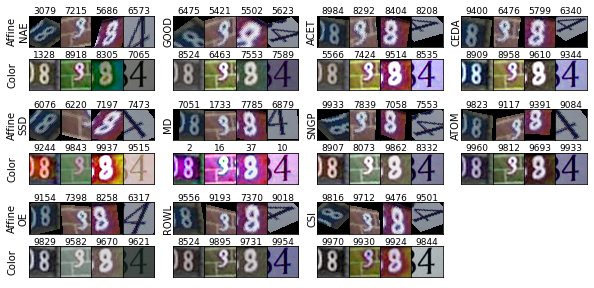

In [24]:
fig = plt.figure(figsize=(10,5))
outer = gridspec.GridSpec(3, 4, wspace=0.15, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
#     print(m)
    
    i_c, i_r = m_idx % 4, m_idx // 4

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.05)
    i = 0; var = 'affine'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'nae'  or m == 'ssd' or m =='oe':
        ax.set_ylabel(f'Affine\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'colorV1'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    if m == 'nae' or m == 'ssd' or m == 'oe':
        ax.set_ylabel(f'Color\n', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    

fig.savefig('neurips2022/fig_svhn_affine_color_suppl.pdf', bbox_inches='tight', dpi=1500)

## 2. CelebA - instance conditional

In [39]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'sngp', 'atom', 'oe', 'rowl', 'csi']
l_identifier = ['cifar_ood_nae/z32gn', 
                'cifar_ood_good/good80', 
                'cifar_ood_good/acet',
                'cifar_ood_good/ceda',
                'cifar_ood_ssd/',
                'cifar_ood_md/md_resnet',
                'cifar_ood_due/sngp',
                'cifar_ood_atom/atom',
                'cifar_ood_oe_scratch/allconv',
                'cifar_ood_atom/rowl',
                'cifar_ood_csi']
dataset = 'celeba'
data = OrderedDict()
for m in l_model:
    data[m] = {}

In [45]:
var = 'affine'
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_score.pkl')
#     sort_val, sort_idx = torch.sort(score)
#     sorted_x = x[sort_idx]
    sorted_x = x
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, score)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

In [46]:
var = 'colorV1'
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_score.pkl')
#     sort_val, sort_idx = torch.sort(score)
#     sorted_x = x[sort_idx]
    sorted_x = x
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, score)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

FileNotFoundError: [Errno 2] No such file or directory: '/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/celeba/colorV1/cifar_atom/cifar_atom_celeba_colorV1_x.pkl'

In [12]:
# l = []
# for m in l_model:
#     for var in ['affine', 'colorV1']:
#         l.append(data[m][var]['rank'][:4000])

In [13]:
# torch.stack(l).to(torch.float).mean(dim=0).argsort()[:4]

In [37]:
for  m in l_model:
    for var in ['affine', 'colorV1']:
        data[m][var]['select'] = [3788,  184,  114, 2526]

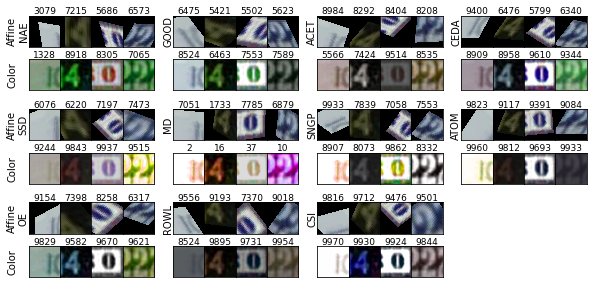

In [38]:
fig = plt.figure(figsize=(10,5))
outer = gridspec.GridSpec(3, 4, wspace=0.15, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
#     print(m)
    
    i_c, i_r = m_idx % 4, m_idx // 4

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.05)
    i = 0; var = 'affine'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'nae'  or m == 'ssd' or m == 'oe':
        ax.set_ylabel(f'Affine\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'colorV1'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    if m == 'nae' or m == 'ssd' or m =='oe':
        ax.set_ylabel(f'Color\n', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    

fig.savefig('neurips2022/fig_celeba_affine_color_suppl.pdf', bbox_inches='tight')

## 3. Origianl Images

In [16]:
# import sys
# sys.path.append('../')
# from loader import get_dataloader
# celeba_dl = get_dataloader({'batch_size': 64, 
#                              'dataset': 'CelebA_OOD', 'n_workers': 0, 'path': '../datasets',  'size': 32,
#                              'shuffle': False, 'split': 'evaluation'})

In [17]:
# l_select = [3788,  184,  114, 2526]

In [18]:
# torch.stack([celeba_dl.dataset[ii][0] for ii in l_select]).shape

In [19]:
# img = torch.stack([celeba_dl.dataset[ii][0] for ii in l_select])

In [20]:
# plt.imshow(make_grid(img).permute(1,2,0))

## 4. StyleGAN

In [6]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'atom', 'oe', 'rowl', 'csi']
l_identifier = ['cifar_ood_nae/z32gn', 
                'cifar_ood_good/good80', 
                'cifar_ood_good/acet',
                'cifar_ood_good/ceda',
                'cifar_ood_ssd/',
                'cifar_ood_md/md_resnet',
                'cifar_ood_atom/atom',
                'cifar_ood_oe_scratch/allconv',
                'cifar_ood_atom/rowl',
                'cifar_ood_csi']
# dataset = 'celeba'
data = OrderedDict()
for m in l_model:
    data[m] = {}

In [10]:
dataset ='svhn' 
var = dataset
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(score)
    sorted_x = x[sort_idx]
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

In [11]:
dataset ='celeba' 
var = dataset
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_x.pkl')
    score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(score)
    sorted_x = x[sort_idx]
    in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
    rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank
    data[m][var]['select'] = list(range(16))

In [26]:
data.keys()

odict_keys(['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'atom', 'oe', 'rowl', 'csi'])

In [12]:
data['oe']['svhn']['select'] = [0,1,15,17]
data['nae']['celeba']['select'] = [1,3,5, 6]
data['md']['celeba']['select'] = [9, 14, 16, 19]

In [48]:
data['atom']['celeba']['select'] = [1,2,3,4]

[]

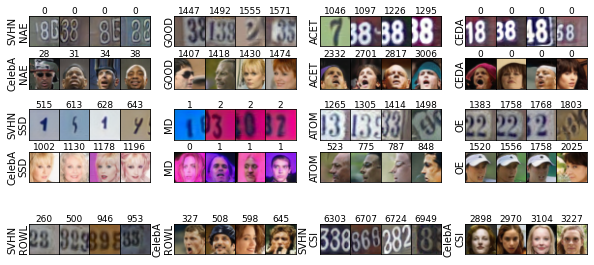

In [49]:
fig = plt.figure(figsize=(10,5))
outer = gridspec.GridSpec(3, 4, wspace=0.2, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
    
    i_c, i_r = m_idx % 4, m_idx // 4

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; var = 'svhn'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'nae' or m == 'ssd':
        ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'celeba'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    if m == 'nae' or m == 'ssd':
        ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    if m_idx == 7: break
    
m_idx = 8; m_data = data[l_model[m_idx]]; m = l_model[m_idx]
i_r, i_c = 2, 0
plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
i = 0; var = 'svhn'
ax = plt.Subplot(fig, plt_a[0])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
# if m == 'nae' or m == 'ssd':
ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
# else:
# ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 1
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 2
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 3
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


i_r, i_c = 2, 1
plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
i = 0; var = 'celeba'; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
# ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 1; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 2; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


i = 3; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


m_idx = 9; m_data = data[l_model[m_idx]]; m = l_model[m_idx]
i_r, i_c = 2, 2
plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
i = 0; var = 'svhn'; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))

ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 1; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 2; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


i = 3; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


i_r, i_c = 2, 3
plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
i = 0; var = 'celeba'; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))

ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 1; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

i = 2; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


i = 3; i_var = i
ax = plt.Subplot(fig, plt_a[i])
ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# fig.savefig('neurips2022/fig_stylegan2.pdf', bbox_inches='tight')

## 5. Weak Detectors

In [26]:
l_model = ['glow', 'pixelcnn', 'ae']
l_identifier = ['cifar_ood_glow/logit_deq', 
                'cifar_ood_pixelcnn/f80',
                'cifar_ood_ae/ghosh_z128']
l_var = ['affine', 'color', 'stylegan2']
l_dataset = ['svhn', 'celeba']
# dataset = 'celeba'
data_ae = OrderedDict()
data_glow = OrderedDict()
data_pixelcnn = OrderedDict()

svhn_select = [1424,  943, 2099, 4369]
celeba_select = [3788,  184,  114, 2526] 

for v in l_var:
    data_ae[v] = {}
    data_glow[v] = {}
    data_pixelcnn[v] = {}

In [27]:
m = 'ae'; identifier = 'cifar_ood_ae/ghosh_z128'
data = data_ae
for var in l_var:
    data[var] = {}
    for dataset in l_dataset:
        if var == 'affine':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'color':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'stylegan2':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
            sort_val, sort_idx = torch.sort(score)
            sorted_x = x[sort_idx]
        in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
        rank = np.searchsorted(in_score, sort_val)

        data[var][dataset] = {}
        data[var][dataset]['x'] = sorted_x
        data[var][dataset]['in_score'] = sorted_x
        data[var][dataset]['rank'] = rank
        if var != 'stylegan2':
            if dataset == 'svhn':
                data[var][dataset]['select'] = svhn_select
            else:
                data[var][dataset]['select'] = celeba_select
        else:
            data[var][dataset]['select'] = [0,1,2,3,4]

In [28]:
m = 'glow'; identifier = 'cifar_ood_glow/logit_deq'
data = data_glow
for var in l_var:
    data[var] = {}
    for dataset in l_dataset:
        if var == 'affine':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'color':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'stylegan2':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
            sort_val, sort_idx = torch.sort(score)
            sorted_x = x[sort_idx]
        in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
        rank = np.searchsorted(in_score, sort_val)

        data[var][dataset] = {}
        data[var][dataset]['x'] = sorted_x
        data[var][dataset]['in_score'] = sorted_x
        data[var][dataset]['rank'] = rank
        if var != 'stylegan2':
            if dataset == 'svhn':
                data[var][dataset]['select'] = svhn_select
            else:
                data[var][dataset]['select'] = celeba_select
        else:
            data[var][dataset]['select'] = [0,1,2,3,4]
        

In [29]:
m = 'pixelcnn'; identifier = 'cifar_ood_pixelcnn/f80'
data = data_pixelcnn
for var in l_var:
    data[var] = {}
    for dataset in l_dataset:
        if var == 'affine':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/affine/cifar_{m}/cifar_{m}_{dataset}_affine_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'color':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/colorV1/cifar_{m}/cifar_{m}_{dataset}_colorV1_score.pkl')
            sort_val = score
            sorted_x = x
        elif var == 'stylegan2':
            x = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_x.pkl')
            score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/results_attack/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
            sort_val, sort_idx = torch.sort(score)
            sorted_x = x[sort_idx]
        in_score = torch.load(f'/opt/home3/swyoon/energy-based-autoencoder/src/pretrained/{identifier}/IN_score.pkl').sort().values
        rank = np.searchsorted(in_score, sort_val)

        data[var][dataset] = {}
        data[var][dataset]['x'] = sorted_x
        data[var][dataset]['in_score'] = sorted_x
        data[var][dataset]['rank'] = rank
        if var != 'stylegan2':
            if dataset == 'svhn':
                data[var][dataset]['select'] = svhn_select
            else:
                data[var][dataset]['select'] = celeba_select
        else:
            data[var][dataset]['select'] = [0,1,2,3,4]        

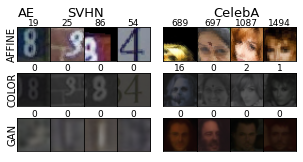

In [30]:
data = data_ae
m = 'ae'

fig = plt.figure(figsize=(5,2.5))
outer = gridspec.GridSpec(3, 2, wspace=0.1, hspace=0.,)

for v_idx, (var, v_data) in enumerate(data.items()):
    
    i_c, i_r = 0, v_idx

    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; dataset = 'svhn'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'stylegan2':
        ax.set_ylabel(f'GAN', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{var.upper()}', labelpad=0., fontsize=10)
        
    if var == 'affine':
        ax.text(0, -11, f'{m.upper()}', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'SVHN', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i_c, i_r = 1, v_idx
    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    
    i = 0; dataset = 'celeba'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'CelebA', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    

    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    

fig.savefig('icml2022/fig_weak_ae.pdf', bbox_inches='tight')

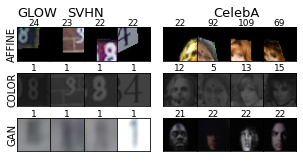

In [31]:
data = data_glow
m = 'glow'

fig = plt.figure(figsize=(5,2.5))
outer = gridspec.GridSpec(3, 2, wspace=0.1, hspace=0.,)

for v_idx, (var, v_data) in enumerate(data.items()):
    
    i_c, i_r = 0, v_idx

    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; dataset = 'svhn'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'stylegan2':
        ax.set_ylabel(f'GAN', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{var.upper()}', labelpad=0., fontsize=10)
        
    if var == 'affine':
        ax.text(0, -11, f'{m.upper()}', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'SVHN', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i_c, i_r = 1, v_idx
    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    
    i = 0; dataset = 'celeba'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'CelebA', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    

    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    

fig.savefig('icml2022/fig_weak_glow.pdf', bbox_inches='tight', dpi=1500)

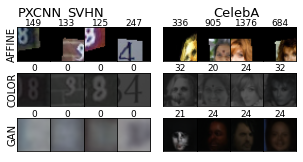

In [32]:
data = data_pixelcnn
m = 'pixelcnn'

fig = plt.figure(figsize=(5,2.5))
outer = gridspec.GridSpec(3, 2, wspace=0.1, hspace=0.,)

for v_idx, (var, v_data) in enumerate(data.items()):
    
    i_c, i_r = 0, v_idx

    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; dataset = 'svhn'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'stylegan2':
        ax.set_ylabel(f'GAN', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{var.upper()}', labelpad=0., fontsize=10)
        
    if var == 'affine':
        ax.text(0, -11, f'PXCNN', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'SVHN', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i_c, i_r = 1, v_idx
    plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    
    i = 0; dataset = 'celeba'
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    if var == 'affine':
        ax.text(16, -11, 'CelebA', fontsize=13)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    

    i = 2; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3; 
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(data[var][dataset]['x'][data[var][dataset]['select'][i]].permute(1,2,0))
    ax.set_title(f'{data[var][dataset]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    

fig.savefig('icml2022/fig_weak_pixelcnn.pdf', bbox_inches='tight', dpi=1500)